In [1]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
# 基本设置 , 导入库
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from util.note_parser import *

sns.set_style('whitegrid', {'font.sans-serif': ['simhei', 'Arial']})


In [2]:
# seaborn 使用的 相关资料路径 api
# def get_file_path(file_name):
#     import os
#     project_path = os.path.dirname(os.getcwd())
#     note_path = r"{}\data\seaborn_data\{}".format(project_path, file_name)
#
#     return note_path


In [3]:
volume1_file_path = get_file_path('volume1.txt')
volume2_file_path = get_file_path('volume2.txt')

# 获取 第一, 二卷小说 以每章划分为单位的 list
volume1_chapter_list = get_chapter_list(volume1_file_path)
volume2_chapter_list = get_chapter_list(volume2_file_path)

# 打印每卷 章节数
# print("volume1 chapter count: {}".format(len(volume1_chapter_list)))
# print("volume2 chapter count: {}".format(len(volume2_chapter_list)))

# 设置 保存csv 路径以及文件名
volume1_chapter_csv_file_path = get_file_path('volume1_discrete_chapter_word.csv')
volume2_chapter_csv_file_path = get_file_path('volume2_discrete_chapter_word.csv')

# 保存
# save_chapter_count_to_csv_file(volume1_chapter_list, volume1_chapter_csv_file_path)
# save_chapter_count_to_csv_file(volume2_chapter_list, volume2_chapter_csv_file_path)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache


C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume1.txt


Loading model cost 0.771 seconds.
Prefix dict has been built successfully.


C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume2.txt


In [4]:
# 保存 第一, 二卷 分词统计 (以卷为单位) 为csv文件

volume1_count_csv_file_path = get_file_path("volume1_split_word.csv")
volume2_count_csv_file_path = get_file_path("volume2_split_word.csv")
# save_volume_count_to_csv_file(volume1_file_path, volume1_count_csv_file_path)
# save_volume_count_to_csv_file(volume2_file_path, volume2_count_csv_file_path)


In [5]:


df1_chapter_word = pd.read_csv(volume1_chapter_csv_file_path, index_col=0)
df2_chapter_word = pd.read_csv(volume2_chapter_csv_file_path, index_col=0)

df1_volume = pd.read_csv(volume1_count_csv_file_path, index_col=0)
df2_volume = pd.read_csv(volume2_count_csv_file_path, index_col=0)



In [6]:
# plot1 关于 第二卷主要人物在每个章节出现的次数统计, 以热量图显示展现
volume2_name_list = ['李槐英', '戴愉', '江华', '郑瑾', '道静', '晓燕', '姑母', '侯瑞', '徐辉', '大娘',  ]
sieve = df2_chapter_word.loc[df2_chapter_word['word'].isin(volume2_name_list)].copy()

sieve.rename(columns={"word":"character"}, inplace=True)
sieve = sieve.pivot(index="character", columns="chapter", values="count")
sieve = sieve.replace(np.nan, 0)

print(sieve)



chapter      1     2     3     4     5     6     7     8     9     10  ...  \
character                                                              ...   
侯瑞          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
大娘          0.0   0.0   0.0   0.0   0.0   0.0  14.0   2.0  30.0   1.0  ...   
姑母          0.0   1.0   1.0   0.0   0.0  19.0  50.0  29.0  20.0   2.0  ...   
徐辉          9.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
戴愉          0.0   0.0   7.0   8.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   
晓燕          2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
李槐英         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
江华         39.0  60.0  22.0   8.0   2.0   5.0   2.0   1.0   0.0   0.0  ...   
道静         39.0  61.0   4.0  35.0  31.0  37.0  84.0  68.0  44.0  33.0  ...   
郑瑾          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

chapter      36    37    38    39    40    41    42    43    44

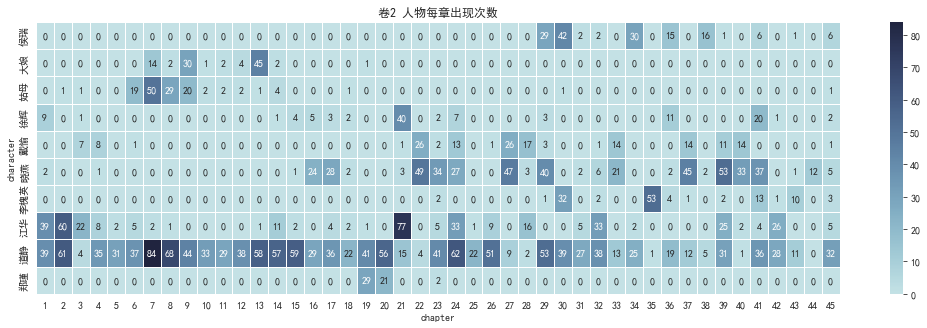

In [7]:
sns.set_style('white', {'font.sans-serif': ['simhei', 'Arial']})
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
f, ax = plt.subplots(figsize=(18, 5))
g = sns.heatmap(sieve, annot=True, linewidths=.5, cmap=cmap, ax=ax)
ax.set_title("卷2 人物每章出现次数")

plt.show()

In [8]:
main_role_list = [ '晓燕', '徐宁', '莉苹', '戴愉', '嘉川', '永泽', '徐辉', '江华', '秀妮', '黑妮', '郑瑾', '姑母', '李槐英', '大娘',]

volume1_main_role_df = df1_volume.loc[df1_volume['word'].isin(main_role_list)].copy()

volume1_main_role_df = volume1_main_role_df.rename(columns={'count':'volume1_count'})

# print(volume1_main_role_df)

volume2_main_role_df = df2_volume.loc[df2_volume['word'].isin(main_role_list)].copy()
volume2_main_role_df = volume2_main_role_df.rename(columns={'count':'volume2_count'})

# print(volume2_main_role_df)


In [9]:
pd_merge = pd.merge(volume1_main_role_df, volume2_main_role_df, on='word',how='outer')
pd_merge = pd_merge.fillna(0)

row_sum_pd = pd_merge['volume1_count'] + pd_merge['volume2_count']
pd_merge.rename(columns={"word":"character"}, inplace=True)
pd_merge['aggregate'] =  row_sum_pd
# print(pd_merge)


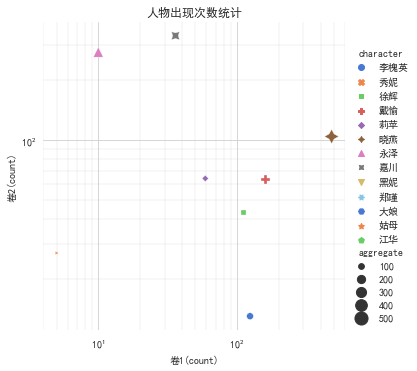

In [10]:
sns.set_style('whitegrid', {'font.sans-serif': ['simhei', 'Arial']})

makers = np.array(['.', ',', '1', '2', '3', '4', '+', 'x', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

choice = np.random.choice(len(makers), len(main_role_list))

set_markers = makers[choice]

# Load the example planets dataset
g = sns.relplot(
    data=pd_merge,
    x="volume2_count",
    y="volume1_count",
    hue="character",
    size="aggregate",
    palette='muted',
    sizes=(10, 200),
    height=5,
    style="character"
)
g.set(xscale="log", yscale="log")
g.set_axis_labels("卷1(count)", "卷2(count)")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.title("人物出现次数统计")

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      character  count
13225        郑瑾     52
13303        大娘    101
13306        徐辉    111
13314       李槐英    124
13321        姑母    134
13327        侯瑞    150
13330        戴愉    161
13340        江华    403
13341        晓燕    480
13343        道静   1440


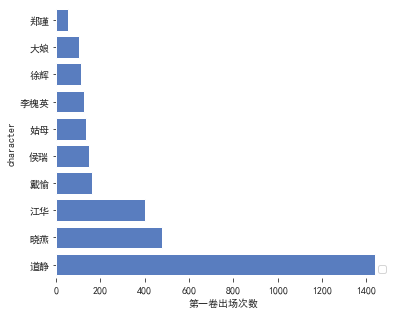

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#sns.set_theme(style="ticks")
sns.set_style('ticks', {'font.sans-serif': ['simhei', 'Arial']})

volume2_name_list = ['李槐英', '戴愉', '江华', '郑瑾', '道静', '晓燕', '姑母', '侯瑞', '徐辉', '大娘',  ]
sieve = df2_volume.loc[df2_volume['word'].isin(volume2_name_list)].copy()

sieve.rename(columns={"word":"character"}, inplace=True)
sieve = sieve.replace(np.nan, 0)

print(sieve)
f, ax = plt.subplots(figsize=(6, 5))

sns.set_color_codes("muted")
sns.barplot(x="count", y="character", data=sieve,
             color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="第一卷出场次数")
sns.despine(left=True, bottom=True)

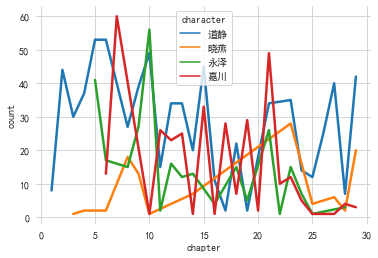

In [14]:

sns.set_style('whitegrid', {'font.sans-serif': ['simhei', 'Arial']})
name_list = ["道静","嘉川","永泽","徐宁","晓燕"]

df1_chapter_word.rename(columns={"word":"character"}, inplace=True)
data = df1_chapter_word.loc[df1_chapter_word['character'].isin(name_list)].copy()


sns.lineplot(data=data, x="chapter", y="count", hue="character", palette="tab10", linewidth=2.5)